# Directories analysis/ Tiles inspection
- Directories and files analysis
- Raster and shape file plot

##  Directories and files

In [1]:
import os
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

# import rioxarray as rxr
import rasterio
from rasterio import plot
from rasterio.plot import show
from rasterio.mask import mask
from rasterio.warp import calculate_default_transform, reproject, Resampling

In [2]:
path = '/data/lscalambrin'
os.listdir(path)

['ib-pi-crop-pipeline-dl',
 'README',
 'vectores',
 'scenes',
 'proyecto_integrador']

In [3]:
path1 = path + '/scenes/20HQH'
path2 = path + '/scenes/20HPH'
path_shapes = path + '/vectores/LotesDibujados/Pergamino'

### /20HQH - path1

In [4]:
safe_paths1 = os.listdir(path1)
safe_paths1

['S2B_MSIL1C_20171016T135059_N0205_R024_T20HQH_20171016T135424.SAFE',
 'S2A_MSIL1C_20180323T140051_N0206_R067_T20HQH_20180323T172252.SAFE',
 'S2B_MSIL1C_20180315T135109_N0206_R024_T20HQH_20180315T185419.SAFE',
 'S2A_MSIL1C_20180313T140051_N0206_R067_T20HQH_20180313T190222.SAFE',
 'S2B_MSIL1C_20180325T135109_N0206_R024_T20HQH_20180325T201358.SAFE',
 'S2B_MSIL1C_20180107T140049_N0206_R067_T20HQH_20180107T153904.SAFE',
 'S2A_MSIL1C_20170911T135111_N0205_R024_T20HQH_20170911T135331.SAFE',
 'S2B_MSIL1C_20171115T135059_N0206_R024_T20HQH_20171115T203126.SAFE',
 'S2A_MSIL1C_20180310T135111_N0206_R024_T20HQH_20180310T201531.SAFE',
 'S2A_MSIL1C_20180303T140051_N0206_R067_T20HQH_20180303T190437.SAFE',
 'S2A_MSIL1C_20180122T140051_N0206_R067_T20HQH_20180122T190059.SAFE',
 'S2B_MSIL1C_20171215T135059_N0206_R024_T20HQH_20171215T153047.SAFE',
 'S2A_MSIL1C_20180109T135101_N0206_R024_T20HQH_20180109T171608.SAFE',
 'S2B_MSIL1C_20170919T140039_N0205_R067_T20HQH_20170919T140040.SAFE',
 'S2A_MSIL1C_2017101

### /20HPH - path3

In [5]:
safe_paths2 = os.listdir(path2)
safe_paths2

['S2B_MSIL1C_20170919T140039_N0205_R067_T20HPH_20170919T140040.SAFE',
 'S2B_MSIL1C_20180107T140049_N0206_R067_T20HPH_20180107T153904.SAFE',
 'S2A_MSIL1C_20180303T140051_N0206_R067_T20HPH_20180303T190437.SAFE',
 'S2B_MSIL1C_20171218T140039_N0206_R067_T20HPH_20171218T202708.SAFE',
 'S2B_MSIL1C_20180206T140049_N0206_R067_T20HPH_20180206T190054.SAFE',
 'S2A_MSIL1C_20171123T140051_N0206_R067_T20HPH_20171123T154138.SAFE',
 'S2A_MSIL1C_20171014T140051_N0205_R067_T20HPH_20171014T140826.SAFE',
 'S2B_MSIL1C_20171128T140039_N0206_R067_T20HPH_20171128T202426.SAFE',
 'S2A_MSIL1C_20180323T140051_N0206_R067_T20HPH_20180323T172252.SAFE',
 'S2B_MSIL1C_20171118T140039_N0206_R067_T20HPH_20171118T171913.SAFE',
 'S2A_MSIL1C_20180122T140051_N0206_R067_T20HPH_20180122T190059.SAFE',
 'S2B_MSIL1C_20171228T140039_N0206_R067_T20HPH_20171228T154204.SAFE',
 'S2A_MSIL1C_20180313T140051_N0206_R067_T20HPH_20180313T190222.SAFE',
 'S2B_MSIL1C_20180328T140049_N0206_R067_T20HPH_20180328T203900.SAFE']

Dates
- Oldest tile -> 11/09/2017 (20170911)
- Newest tile -> 30/03/2018 (20180330)

### Inside each .SAFE file

In [6]:
os.listdir(path1+'/'+safe_paths1[0])

['GRANULE',
 'rep_info',
 'MTD_MSIL1C.xml',
 'AUX_DATA',
 'INSPIRE.xml',
 'HTML',
 'DATASTRIP',
 'manifest.safe']

In [7]:
os.listdir(path1+'/'+safe_paths1[0]+'/GRANULE')

['L1C_T20HQH_A003196_20171016T135424']

In [8]:
os.listdir(path1+'/'+safe_paths1[0]+'/GRANULE/L1C_T20HQH_A003196_20171016T135424')

['QI_DATA', 'IMG_DATA', 'AUX_DATA', 'MTD_TL.xml']

### Bands files

In [9]:
os.listdir(path1+'/'+safe_paths1[0]+'/GRANULE/L1C_T20HQH_A003196_20171016T135424/IMG_DATA')

['T20HQH_20171016T135059_B04.jp2',
 'T20HQH_20171016T135059_B09.jp2',
 'T20HQH_20171016T135059_B12.jp2',
 'T20HQH_20171016T135059_TCI.jp2',
 'T20HQH_20171016T135059_B06.jp2',
 'T20HQH_20171016T135059_B11.jp2',
 'T20HQH_20171016T135059_B08.jp2',
 'T20HQH_20171016T135059_B8A.jp2',
 'T20HQH_20171016T135059_B10.jp2',
 'T20HQH_20171016T135059_B07.jp2',
 'T20HQH_20171016T135059_B01.jp2',
 'T20HQH_20171016T135059_B03.jp2',
 'T20HQH_20171016T135059_B02.jp2',
 'T20HQH_20171016T135059_B05.jp2']

In [10]:
os.listdir(path1+'/'+safe_paths1[0]+'/GRANULE/L1C_T20HQH_A003196_20171016T135424/AUX_DATA')

['AUX_ECMWFT']

### Quality info files

In [11]:
# os.listdir(path1+'/'+safe_paths1[0]+'/GRANULE/L1C_T20HQH_A003196_20171016T135424/QI_DATA')

### Shape file

In [12]:
list_path_shapes = os.listdir(path_shapes)
list_path_shapes

['20180228_Completo_32720.shp',
 '20180228_Completo_32720.shx',
 '20180228_Completo_32720.dbf',
 '20180228_Completo_32720.prj']

In [13]:
pergamino_gpdf = gpd.read_file(path_shapes+'/20180228_Completo_32720.shp')
pergamino_gpdf.head()

,id,area,TILE,geometry
0,1,3.6609,20HQH,"POLYGON ((737301.729 6271324.733, 737303.083 6..."
1,2,2.5839,20HQH,"POLYGON ((737567.675 6271612.546, 737821.144 6..."
2,3,11.9731,20HQH,"POLYGON ((740040.757 6272748.103, 740344.761 6..."
3,4,8.0376,20HQH,"POLYGON ((739862.189 6272566.378, 740022.987 6..."
4,5,3.4178,20HQH,"POLYGON ((739458.706 6272784.321, 739677.752 6..."


## Raster and shape file plot

#### Raster Plot
- /20HQH - path1

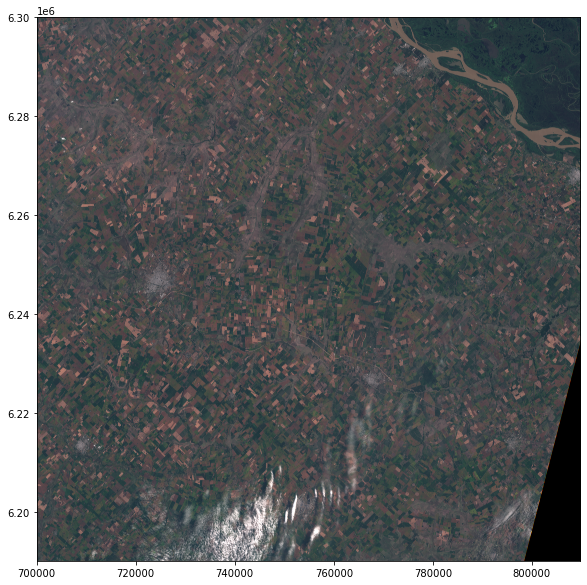

In [14]:
for root, dir, files in os.walk(path1+'/'+safe_paths1[1]):
    for file in files:
        if file.endswith("TCI.jp2"):
            TCI = (os.path.join(root, file))

            
rgb1 = rasterio.open(TCI, driver='JP2OpenJPEG') #RGB
bbox1 = rgb1.bounds
crs1 = rgb1.crs


fig, ax = plt.subplots(figsize=(10, 10))
show(rgb1.read(), transform=rgb1.transform, ax=ax)
plt.show()

#### Raster Plot
- /20HPH - path2

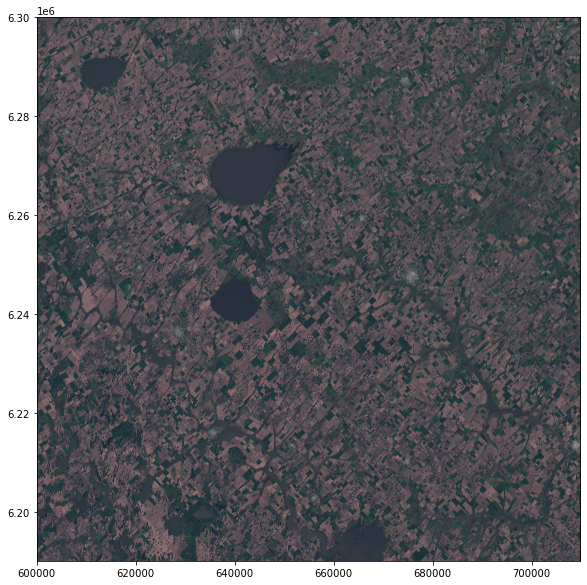

In [15]:
for root, dir, files in os.walk(path2+'/'+safe_paths2[6]):
    for file in files:
        if file.endswith("TCI.jp2"):
            TCI3 = (os.path.join(root, file))

rgb3 = rasterio.open(TCI3, driver='JP2OpenJPEG') #RGB
bbox3 = rgb3.bounds
crs3 = rgb3.crs

fig, ax = plt.subplots(figsize=(10, 10))
show(rgb3.read(), transform=rgb3.transform, ax=ax)
plt.show()

In [16]:
### CRS
print(f'CRS1: {crs1}')
print(f'CRS3: {crs3}')

CRS1: EPSG:32720
CRS3: EPSG:32720


#### Shape
- Pergamino

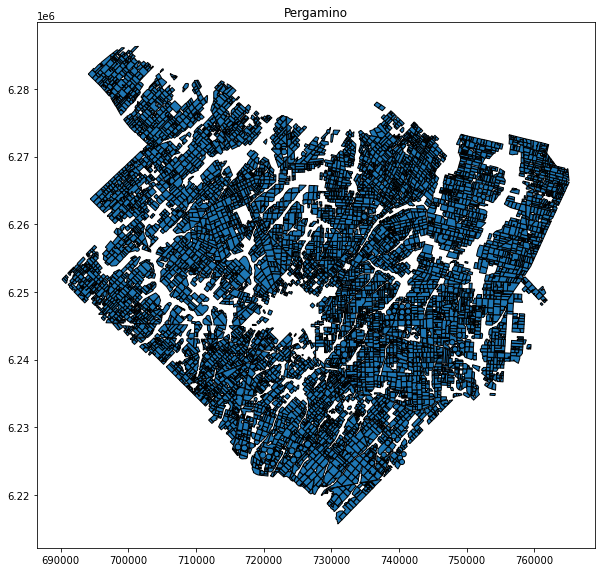

In [17]:
fig, ax1 = plt.subplots(figsize=(10, 10))
pergamino_gpdf.plot(edgecolor='black',ax=ax1)
ax1.set(title="Pergamino")
# plt.savefig(fname = 'pergamino_shape.png')
plt.show()

#### Raster + shape
- Tile 20HQH
- Tile 20HPH

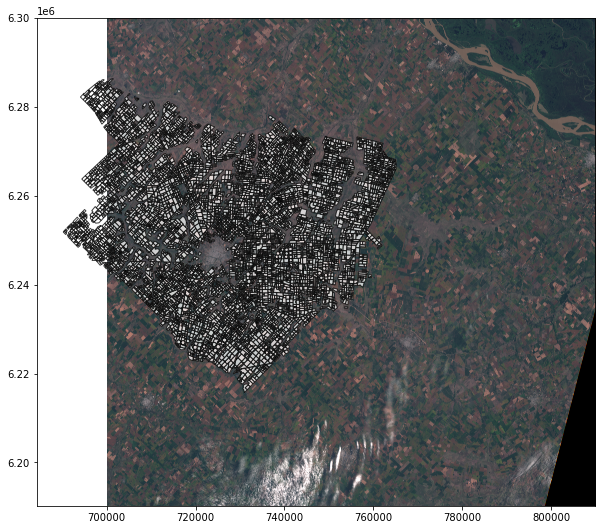

In [18]:
### Tile 20HQH

fig, ax = plt.subplots(figsize=(10, 10))
show(rgb1.read(), transform=rgb1.transform, ax=ax)
pergamino_gpdf.plot(ax=ax, color='white', edgecolor='black', alpha=.75) ## alpha is the transparency setting
plt.show()

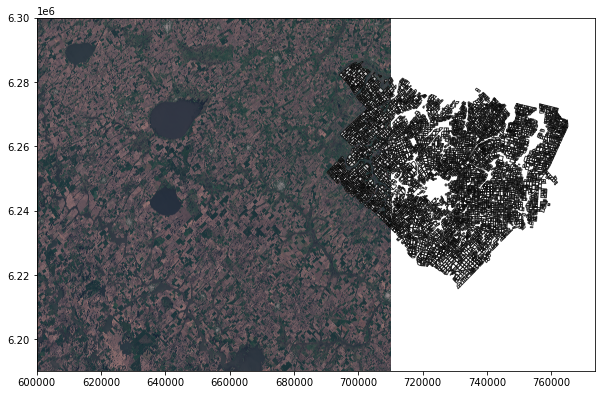

In [19]:
### Tile 20HPH

fig, ax = plt.subplots(figsize=(10, 10))
show(rgb3.read(), transform=rgb3.transform, ax=ax)
pergamino_gpdf.plot(ax=ax, color='white', edgecolor='black', alpha=.75) ## alpha is the transparency setting
plt.show()

### Conclusion
Now we can conclude that for our AOI (Pergamino) we'll need tiles 20HPH and 20HQH
